In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


# 1. Make Profit Feature

In [4]:
def profit_calc(x):
    profit=(x['casual']*20)+(x['registered']*5)
    taxes=profit*0.14
    maint=1500/(365*24)
    profit=profit-(taxes+maint)
    return profit

df['Profit']=df.apply(profit_calc,axis=1)
df
    

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


# 2. Distribution rental_bikes_count & profit.

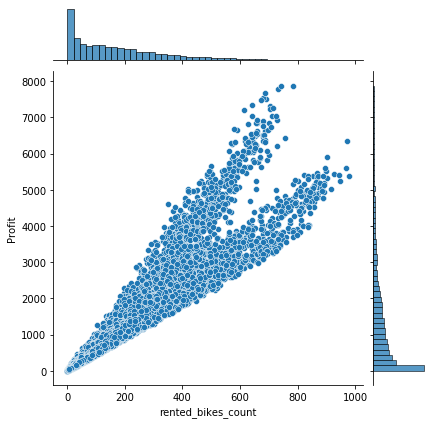

In [6]:
sns.jointplot(x="rented_bikes_count",y="Profit",data=df)

# 3- Profit for each day


In [7]:
df['day']=df['datetime'].apply( lambda x : x.split()[0])

In [8]:
df.groupby('day').sum()


,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
day,,,,,,,,,
2011-01-01,0.0,0.0,254.20,1109.0,185.9987,331,654,985,8501.290411
2011-01-02,0.0,0.0,297.66,983.0,275.0015,131,670,801,5130.261644
2011-01-03,0.0,21.0,135.30,567.0,183.0038,120,1229,1349,7344.932877
2011-01-04,0.0,17.0,159.90,1116.0,178.0056,108,1454,1562,8105.861644
2011-01-05,0.0,20.0,175.48,839.0,214.0114,82,1518,1600,7933.861644
...,...,...,...,...,...,...,...,...,...
2012-12-15,0.0,0.0,205.82,1184.0,142.0065,767,4280,5047,31592.290411
2012-12-16,0.0,0.0,310.78,1337.0,113.0022,538,3248,3786,23215.890411
2012-12-17,0.0,22.0,274.70,1448.0,117.0021,212,4373,4585,22446.190411


In [9]:
df.groupby('day').sum()["Profit"]

day
2011-01-01     8501.290411
2011-01-02     5130.261644
2011-01-03     7344.932877
2011-01-04     8105.861644
2011-01-05     7933.861644
                  ...     
2012-12-15    31592.290411
2012-12-16    23215.890411
2012-12-17    22446.190411
2012-12-18    29476.690411
2012-12-19    26939.690411
Name: Profit, Length: 456, dtype: float64

# 4. Which season that has more registeration & profit.

In [10]:
df.groupby('season').sum()['registered']


season
Fall      488252
Spring    265322
Summer    446991
Winter    457276
Name: registered, dtype: int64

In [13]:
df.groupby('season').sum()['Profit']


season
Fall      4.509295e+06
Spring    1.836294e+06
Summer    4.093775e+06
Winter    3.286013e+06
Name: Profit, dtype: float64

# 5. Which weather condition that has more registeration & profit.

In [15]:
df.groupby('weather').sum()['registered']


weather
Clear    951449
Mist     336229
Rainy     70204
Snowy       158
Name: registered, dtype: int64

In [16]:
df.groupby('weather').sum()['Profit']


weather
Clear    8.062699e+06
Mist     2.645321e+06
Rainy    5.096033e+05
Snowy    7.824288e+02
Name: Profit, dtype: float64

# 6. Correlation between profit & bikes count with all features.

In [21]:
df.corr()[['Profit','rented_bikes_count']]

,Profit,rented_bikes_count
holiday,0.017410,-0.005827
workingday,-0.150218,0.010940
temp,0.462618,0.391867
humidity,-0.358150,-0.317282
windspeed,0.100205,0.097747
casual,0.902713,0.690414
registered,0.822156,0.970948
rented_bikes_count,0.934490,1.000000
Profit,1.000000,0.934490


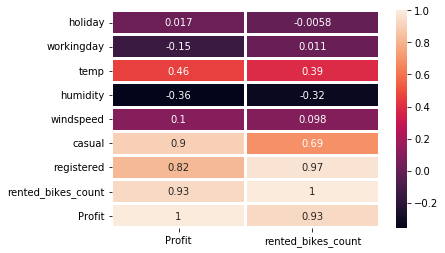

In [25]:
sns.heatmap(df.corr()[['Profit','rented_bikes_count']],linecolor="white",linewidths=2,annot=True)

# 7. Rentals during rush hours (7-9 am & 3-5 pm).

In [32]:
df["datetime"]=pd.to_datetime(df['datetime'],format="%Y/%m/%d %H:%M:%S")
df['rental_hour']=df['datetime'].dt.hour

In [33]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,day,rental_hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011-01-01,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011-01-01,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011-01-01,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011-01-01,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012-12-19,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012-12-19,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012-12-19,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012-12-19,22


In [80]:
df[df["rental_hour"].between(7,9)]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,day,rental_hour
7,2011-01-01 07:00:00,Spring,0.0,0.0,Clear,8.20,NaN,NaN,1,2,3,25.628767,2011-01-01,7
8,2011-01-01 08:00:00,Spring,0.0,0.0,NaN,9.84,NaN,0.0000,1,7,8,47.128767,2011-01-01,8
9,2011-01-01 09:00:00,Spring,0.0,0.0,Clear,NaN,76.0,0.0000,8,6,14,163.228767,2011-01-01,9
30,2011-01-02 07:00:00,Spring,0.0,0.0,NaN,16.40,NaN,12.9980,0,1,1,4.128767,2011-01-02,7
31,2011-01-02 08:00:00,Spring,0.0,0.0,Rainy,16.40,71.0,15.0013,0,8,8,34.228767,2011-01-02,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,2012-12-18 08:00:00,Winter,0.0,NaN,Clear,15.58,94.0,NaN,10,652,662,2975.428767,2012-12-18,8
10847,2012-12-18 09:00:00,Winter,0.0,1.0,Clear,NaN,87.0,6.0032,19,307,326,1646.728767,2012-12-18,9
10869,2012-12-19 07:00:00,Winter,0.0,1.0,Clear,NaN,75.0,NaN,3,360,363,1599.428767,2012-12-19,7
10870,2012-12-19 08:00:00,Winter,0.0,1.0,Clear,NaN,87.0,NaN,13,665,678,3082.928767,2012-12-19,8


In [81]:
df[df["rental_hour"].between(3,5)]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,day,rental_hour
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011-01-01,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011-01-01,4
5,2011-01-01 05:00:00,NaN,0.0,NaN,Mist,9.84,NaN,6.0032,0,1,1,4.128767,2011-01-01,5
27,2011-01-02 03:00:00,Spring,0.0,0.0,Mist,NaN,NaN,12.9980,2,4,6,51.428767,2011-01-02,3
28,2011-01-02 04:00:00,Spring,0.0,NaN,Mist,18.86,NaN,12.9980,2,1,3,38.528767,2011-01-02,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,2012-12-18 04:00:00,Winter,0.0,1.0,Clear,17.22,82.0,11.0014,3,5,8,72.928767,2012-12-18,4
10843,2012-12-18 05:00:00,Winter,0.0,NaN,Clear,NaN,87.0,6.0032,0,36,36,154.628767,2012-12-18,5
10865,2012-12-19 03:00:00,Winter,0.0,1.0,NaN,NaN,75.0,8.9981,0,5,5,21.328767,2012-12-19,3
10866,2012-12-19 04:00:00,Winter,0.0,NaN,NaN,9.84,NaN,NaN,1,6,7,42.828767,2012-12-19,4


# 7. Rentals during workday & holiday

In [83]:
df["holiday"].unique()

array([ 0., nan,  1.])

In [84]:
df["workingday"].unique()

array([ 0., nan,  1.])

In [85]:
df[df['holiday']>0]['rented_bikes_count']

373       16
374        8
375        2
376        3
378        5
        ... 
10257    353
10258    304
10259    155
10260    112
10261     63
Name: rented_bikes_count, Length: 292, dtype: int64

In [86]:
df[df['holiday']>0]['rented_bikes_count'].sum()


54128

In [88]:
df[df['workingday']>0]['rented_bikes_count']

47         5
48         2
50         3
51        30
52        64
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: rented_bikes_count, Length: 6367, dtype: int64

In [89]:
df[df['workingday']>0]['rented_bikes_count'].sum()

1226368

# 8. Registered or casual is more.

In [90]:
df["registered"].sum()

1693341

In [91]:
df["casual"].sum()

392135

In [93]:
df["registered"].sum()>df["casual"].sum()

True

# 9. What is the average of bikes would be registered during the week.

In [94]:
df["week"]=df["datetime"].dt.week

In [95]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,day,rental_hour,week
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011-01-01,0,52
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011-01-01,1,52
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011-01-01,2,52
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011-01-01,3,52
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011-01-01,4,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012-12-19,19,51
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012-12-19,20,51
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012-12-19,21,51
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012-12-19,22,51


In [103]:
df.groupby("week").mean()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,rental_hour
week,,,,,,,,,,
1,0.074074,0.630508,9.266000,48.421739,14.622549,9.762918,85.310030,95.072948,534.584086,11.683891
2,0.000000,0.691756,9.161606,58.351695,14.397659,6.378788,82.381818,88.760606,463.785737,11.645455
3,0.323944,0.696000,10.025391,59.926316,18.336971,5.110390,93.811688,98.922078,491.117728,12.077922
5,0.000000,0.642857,11.540741,66.777174,11.382163,8.536398,95.072797,103.609195,555.467848,11.586207
6,0.000000,0.709677,9.718519,56.137255,13.196340,6.930303,94.621212,101.551515,525.901191,11.642424
7,0.000000,0.777778,14.354980,47.020101,16.300128,15.425806,108.958065,124.383871,733.672316,11.558065
9,0.000000,0.578199,13.810282,57.924051,15.733865,15.464435,93.192469,108.656904,666.544667,11.527197
10,0.000000,0.719178,14.092236,48.587983,18.228047,21.712121,112.318182,134.030303,856.245434,11.657576
11,0.000000,0.773585,19.020356,61.423077,11.889380,42.899351,142.649351,185.548701,1351.089806,11.607143


In [104]:
df.groupby("week").mean()["registered"]

week
1      85.310030
2      82.381818
3      93.811688
5      95.072797
6      94.621212
7     108.958065
9      93.192469
10    112.318182
11    142.649351
12    215.458333
13     89.229167
14    135.964179
15    141.637725
16    181.722222
17     92.208333
18    171.253205
19    175.181548
20    184.820833
22    171.182292
23    193.092262
24    190.803571
25    214.645833
26    140.708333
27    167.973214
28    190.752976
29    205.763889
31    175.121528
32    182.452381
33    194.121528
35    139.840278
36    170.047904
37    207.447761
38    210.416667
39     88.562500
40    190.029762
41    183.711310
42    206.905759
44    162.237500
45    168.797015
46    162.028846
47    210.416667
48    145.645833
49    155.738095
50    162.455357
51    183.062500
52     41.295775
Name: registered, dtype: float64

# 10. Schools (9-12) & (2-6) profit.

In [109]:
def schools(x):
    if x in range(2,7):
        return True
    elif x in range(9,13):
        return True
    else: 
        return False
    
    
df[df["datetime"].dt.month.apply(schools)]["Profit"]

431        60.028767
432        12.728767
433         8.428767
434         8.428767
435        12.728767
            ...     
10881    1534.928767
10882    1165.128767
10883     773.828767
10884     709.328767
10885     429.828767
Name: Profit, Length: 8178, dtype: float64

 # 11. Profit in 2011 & saturdays & season fall

In [129]:
df['day_name'] = df['datetime'].dt.day_name()
df[(df['year']==2011)&(df['season']=='Fall')&(df['day_name']=="Saturday")]['Profit'].sum()

351695.0794520548

# task 2

In [130]:
df=pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# loan amount of education and not aeducation

In [133]:
df.groupby("Education").sum()["LoanAmount"]

Education
Graduate        71638.0
Not Graduate    15038.0
Name: LoanAmount, dtype: float64

# number of Gender

In [137]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [138]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# averge of applicant income for males and females

In [142]:
df.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

# loan amount according to gender

In [151]:
df.groupby('Gender')['LoanAmount'].sum()

Gender
Female    13810.0
Male      70155.0
Name: LoanAmount, dtype: float64